✅ Backtest results saved to results/backtest_results.csv


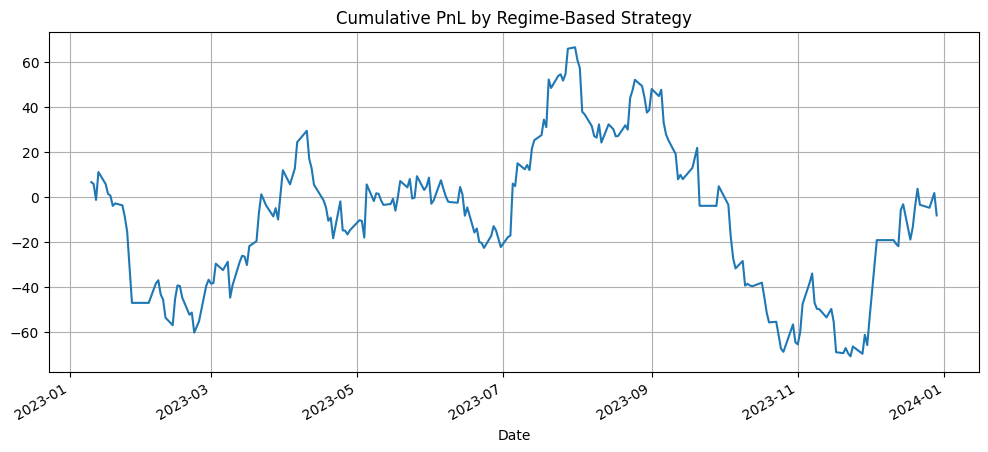

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load data
features = pd.read_csv('data/processed/features.csv', index_col=0, parse_dates=True)
spread = pd.read_csv('data/processed/spread.csv', index_col=0, parse_dates=True).squeeze()

# Load regime states
states = np.loadtxt('data/processed/regime_states.txt', dtype=int)

# Align signals to features
signals = pd.Series(0, index=features.index)
signals.iloc[states == 0] = 1
signals.iloc[states == 1] = -1

# Compute PnL
returns = spread.diff().reindex(features.index)
pnl = signals.shift() * returns
pnl.dropna(inplace=True)

# Strategy metrics
sharpe = pnl.mean() / pnl.std() * np.sqrt(252)
drawdown = pnl.cumsum().cummax() - pnl.cumsum()
max_dd = drawdown.max()

# Save results
os.makedirs("results", exist_ok=True)
results = pd.DataFrame({
    "pnl": pnl,
    "sharpe": [sharpe] * len(pnl),
    "max_dd": [max_dd] * len(pnl)
})
results.to_csv("results/backtest_results.csv")
print("✅ Backtest results saved to results/backtest_results.csv")

# Plot
pnl.cumsum().plot(title='Cumulative PnL by Regime-Based Strategy', figsize=(12, 5))
plt.grid()
plt.show()
